In [13]:
import numpy as np
import tensorflow as tf
import tensorflow.keras as K
import matplotlib.pyplot as plt

# Set seeds for reproducibility

In [14]:

np.random.seed(11)
tf.random.set_seed(11)

# Set the Hyperparameters

In [15]:

batch_size = 256
max_epochs = 50
learning_rate = 1e-3
hidden_dim = 128
original_dim = 784

Load and preprocess MNIST data

In [16]:

(x_train, _), (x_test, _) = K.datasets.mnist.load_data()
x_train = x_train / 255.
x_test = x_test / 255.
x_train = x_train.astype(np.float32).reshape(-1, 784)
x_test = x_test.astype(np.float32).reshape(-1, 784)
training_dataset = tf.data.Dataset.from_tensor_slices(x_train).batch(batch_size)

Define the Autoencoder class

In [17]:

class Autoencoder(tf.keras.Model):
    def __init__(self, hidden_dim, original_dim):
        super(Autoencoder, self).__init__()
        self.encoder = tf.keras.Sequential([
            tf.keras.layers.Input(shape=(original_dim,)),
            tf.keras.layers.Dense(hidden_dim, activation='relu')
        ])
        self.decoder = tf.keras.Sequential([
            tf.keras.layers.Dense(original_dim, activation='sigmoid')
        ])
        self.loss = []  # To track loss per epoch

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

Loss function (Mean Squared Error)

In [18]:

def loss(preds, real):
    return tf.reduce_mean(tf.square(tf.subtract(preds, real)))

One training step

In [19]:
# 
def train(loss_fn, model, opt, original):
    with tf.GradientTape() as tape:
        preds = model(original)
        reconstruction_error = loss_fn(preds, original)
        gradients = tape.gradient(reconstruction_error, model.trainable_variables)
        opt.apply_gradients(zip(gradients, model.trainable_variables))
    return reconstruction_error

Full training loop

In [20]:
def train_loop(model, opt, loss_fn, dataset, epochs=20):
    for epoch in range(epochs):
        epoch_loss = 0
        for step, batch_features in enumerate(dataset):
            loss_values = train(loss_fn, model, opt, batch_features)
            epoch_loss += loss_values
        model.loss.append(epoch_loss)
        print(f"Epoch {epoch + 1}/{epochs}, Loss: {epoch_loss.numpy():.4f}")

Instantiate and train the autoencoder

In [21]:
autoencoder = Autoencoder(hidden_dim=hidden_dim, original_dim=original_dim)
opt = tf.keras.optimizers.Adam(learning_rate=learning_rate)
train_loop(autoencoder, opt, loss, training_dataset, epochs=max_epochs)

Epoch 1/50, Loss: 12.3048
Epoch 2/50, Loss: 5.0994
Epoch 3/50, Loss: 3.4420
Epoch 4/50, Loss: 2.5224
Epoch 5/50, Loss: 1.9357
Epoch 6/50, Loss: 1.5478
Epoch 7/50, Loss: 1.2789
Epoch 8/50, Loss: 1.0936
Epoch 9/50, Loss: 0.9588
Epoch 10/50, Loss: 0.8565
Epoch 11/50, Loss: 0.7777
Epoch 12/50, Loss: 0.7187
Epoch 13/50, Loss: 0.6721


2025-06-08 00:12:51.644839: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 14/50, Loss: 0.6338
Epoch 15/50, Loss: 0.6002
Epoch 16/50, Loss: 0.5721
Epoch 17/50, Loss: 0.5487
Epoch 18/50, Loss: 0.5291
Epoch 19/50, Loss: 0.5124
Epoch 20/50, Loss: 0.4980
Epoch 21/50, Loss: 0.4853
Epoch 22/50, Loss: 0.4740
Epoch 23/50, Loss: 0.4639
Epoch 24/50, Loss: 0.4549
Epoch 25/50, Loss: 0.4470
Epoch 26/50, Loss: 0.4399
Epoch 27/50, Loss: 0.4335
Epoch 28/50, Loss: 0.4275
Epoch 29/50, Loss: 0.4224
Epoch 30/50, Loss: 0.4173
Epoch 31/50, Loss: 0.4128
Epoch 32/50, Loss: 0.4086
Epoch 33/50, Loss: 0.4049
Epoch 34/50, Loss: 0.4015
Epoch 35/50, Loss: 0.3984
Epoch 36/50, Loss: 0.3957
Epoch 37/50, Loss: 0.3931
Epoch 38/50, Loss: 0.3904
Epoch 39/50, Loss: 0.3872
Epoch 40/50, Loss: 0.3843
Epoch 41/50, Loss: 0.3821
Epoch 42/50, Loss: 0.3801
Epoch 43/50, Loss: 0.3778
Epoch 44/50, Loss: 0.3758
Epoch 45/50, Loss: 0.3742
Epoch 46/50, Loss: 0.3728
Epoch 47/50, Loss: 0.3715
Epoch 48/50, Loss: 0.3702
Epoch 49/50, Loss: 0.3688
Epoch 50/50, Loss: 0.3675


Plot loss curve

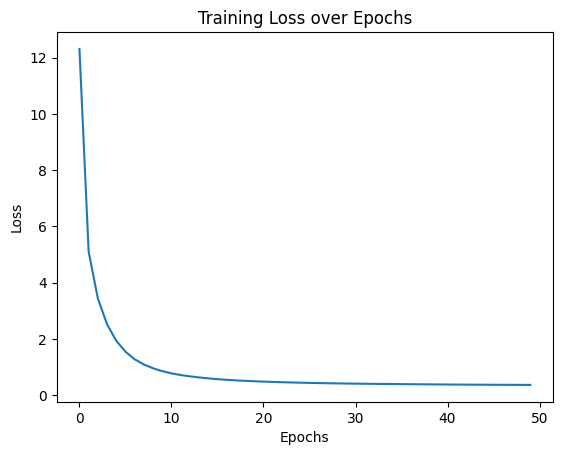

In [ ]:
plt.plot(range(max_epochs), autoencoder.loss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.show()

Visualize original vs reconstructed digits

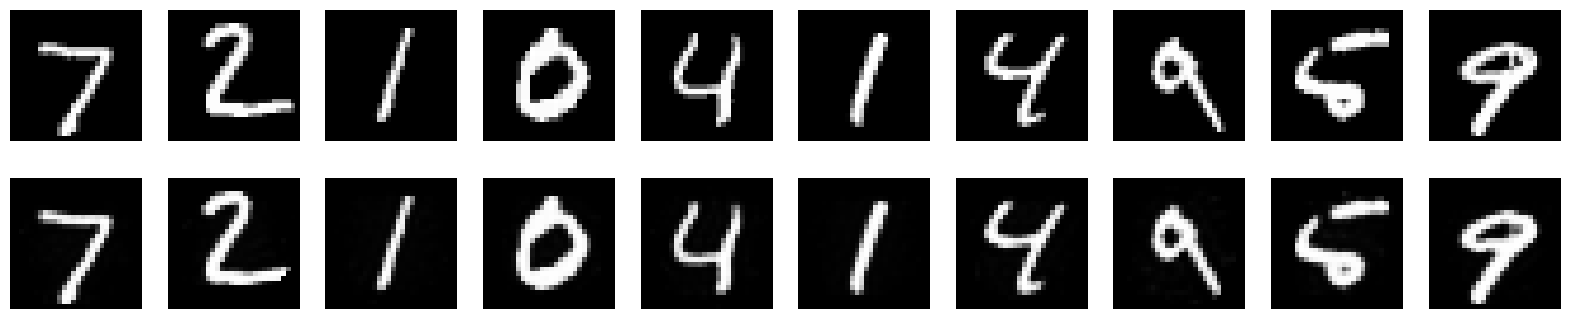

In [23]:
number = 10
plt.figure(figsize=(20, 4))
reconstructed = autoencoder(x_test).numpy()

for i in range(number):
    # Original
    ax = plt.subplot(2, number, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    ax.axis('off')

    # Reconstructed
    ax = plt.subplot(2, number, i + 1 + number)
    plt.imshow(reconstructed[i].reshape(28, 28), cmap='gray')
    ax.axis('off')

plt.show()